Hello   

In [1]:
! pip install taplib
! pip install Stargazer

   ---------------------------------------- 0.0/56.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.0 MB 445.2 kB/s eta 0:02:06
   ---------------------------------------- 0.2/56.0 MB 1.5 MB/s eta 0:00:37
   ---------------------------------------- 0.7/56.0 MB 4.8 MB/s eta 0:00:12
   - -------------------------------------- 1.6/56.0 MB 8.4 MB/s eta 0:00:07
   - -------------------------------------- 1.8/56.0 MB 7.5 MB/s eta 0:00:08
   -- ------------------------------------- 3.5/56.0 MB 12.3 MB/s eta 0:00:05
   -- ------------------------------------- 3.9/56.0 MB 13.0 MB/s eta 0:00:05
   --- ------------------------------------ 4.8/56.0 MB 13.3 MB/s eta 0:00:04
   ---- ----------------------------------- 6.2/56.0 MB 14.8 MB/s eta 0:00:04
   ----- ---------------------------------- 7.1/56.0 MB 15.3 MB/s eta 0:00:04
   ----- ---------------------------------- 7.5/56.0 MB 15.5 MB/s eta 0:00:04
   --


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pltly
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import tap
import pandas as pd
from scipy.stats import skew, kurtosis

In [3]:
link = 'https://raw.githubusercontent.com/emmadefrang/MGT-499/refs/heads/main/SOC-project/land_use_change_rank.csv'

In [4]:
luc_df = pd.read_csv(link)
luc_df.head()

,IDstudy,plotID,land_use_change_rank2
0,1,3,4
1,1,3,4
2,1,3,4
3,1,3,4
4,1,4,2


In [5]:
from pydoc import describe
def generate_data_summary(df):

  mean = np.mean(df)
  median = np.median(df)
  std_dev = np.std(df)
  skewness = skew(df)
  kurt = kurtosis(df)
  description = df.describe()

  # Print summary statistics
  print(f"Mean: {mean:.2f}")
  print(f"Median: {median:.2f}")
  print(f"Standard Deviation: {std_dev:.2f}")
  print(f"Skewness: {skewness:.2f}")
  print(f"Kurtosis: {kurt:.2f}")
  print(description)

In [6]:
#List the files in MGT-499

! ln MGT-499

#List the files in the subfolder SOC-project
! ln MGT-499/SOC-project

'ln' is not recognized as an internal or external command,
operable program or batch file.
'ln' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
#Read the csv file SOC perrenials DATABASE.csv from the subfolder SOC-project
#This accesses a public github repository so all of us can run this file on our computers since the file is stored remotely
df = pd.read_csv(r"https://github.com/emmadefrang/MGT-499/raw/refs/heads/main/SOC-project/SOC%20perennials%20DATABASE.csv",
                 skiprows=1,
                 encoding = 'cp1252')
df.head()


# df = pd.read_excel(r"/content/SOC perennials DATABASE.xls", skiprows=1)  #We need to access the file from an online repository so everyone can work on the code
# df.head()

HTTPError: HTTP Error 404: Not Found

In [ ]:
df.columns

Index(['ID', 'IDstudy', 'plotID', 'country', 'region', 'temperature_Celsiul',
       'precipitation_mm', 'climate', 'Latitud', 'Longitud', 'bedrock',
       'soil_type', 'USDA', 'TYPE_CHANGE', 'CROP_current', 'CROP_type',
       'cropAGE', 'current_land_use*', 'LUC_this_study', 'previous_land_use*',
       'years_since_luc', 'TEMPORAL_only_this study', 'timeTEMPORAL',
       'CHANGE_management', 'year_since_MANAGEMENT_CHANGE', 'soil_treatments',
       'tillageYESNO', 'tillage_type', 'fertilizerYESNO', 'fet_type',
       'rate_fertilizer_kh_ha', 'pesticides', 'org_amendYESNO',
       'org_amend_type', 'prev_man', 'SINGLE_DATA-MULTIPLE_SINGLEAMPLING',
       'DIF_DEPTH_current_point', 'CONTI_DEPTH', 'NUM_DEPTH', 'year_measure',
       'N_plots_current', 'N_sample_per_plot_current', 'N_measured_current',
       'soil_from_cm_current', 'soil_to_cm_current', 'depth_midpoint_current',
       'bulk_density_Mg_m3_current', '%clay_current', '%silt_current',
       '%sand_current', 'ph_current'

In [ ]:
# Import LUC database from github and merge
df_luc = pd.read_csv(link)
df_luc.head()

,IDstudy,plotID,land_use_change_rank2
0,1,3,4
1,1,3,4
2,1,3,4
3,1,3,4
4,1,4,2


In [ ]:
soc_df = df.loc[:, ['IDstudy','plotID', 'country', 'region', 'temperature_Celsiul', 'CHANGE_management','SOC_Mg_ha_current', 'SOC_Mg_ha_previous', 'soil_to_cm_current','soil_from_cm_current', 'soil_to_cm_previous','soil_from_cm_previous']].copy()
soc_df.head(15)

,IDstudy,plotID,country,region,temperature_Celsiul,CHANGE_management,SOC_Mg_ha_current,SOC_Mg_ha_previous,soil_to_cm_current,soil_from_cm_current,soil_to_cm_previous,soil_from_cm_previous
0,1,1,Brazil,SaoPaulo,21.0,NO,20.70,17.39,10.0,0.0,10.0,0.0
1,1,1,Brazil,SaoPaulo,21.0,NO,12.54,15.57,20.0,10.0,20.0,10.0
2,1,1,Brazil,SaoPaulo,21.0,NO,30.92,55.38,60.0,20.0,60.0,20.0
3,1,1,Brazil,SaoPaulo,21.0,NO,36.23,36.10,100.0,60.0,100.0,60.0
4,1,2,Brazil,SaoPaulo,21.0,NO,16.43,16.28,10.0,0.0,10.0,0.0
5,1,2,Brazil,SaoPaulo,21.0,NO,14.51,18.26,20.0,10.0,20.0,10.0
6,1,2,Brazil,SaoPaulo,21.0,NO,42.70,63.95,60.0,20.0,60.0,20.0
7,1,2,Brazil,SaoPaulo,21.0,NO,39.42,49.20,100.0,60.0,100.0,60.0
8,1,3,Brazil,SaoPaulo,21.0,NO,14.60,13.59,10.0,0.0,10.0,0.0
9,1,3,Brazil,SaoPaulo,21.0,NO,15.96,15.33,20.0,10.0,20.0,10.0


In [ ]:
#Change the CHANGE_management column into binary where 1=yes and 0=no

soc_df['CHANGE_management'] = soc_df['CHANGE_management'].apply(lambda x: 1 if x == 'YES' else 0)
soc_df.head()

,IDstudy,plotID,country,region,temperature_Celsiul,CHANGE_management,SOC_Mg_ha_current,SOC_Mg_ha_previous,soil_to_cm_current,soil_from_cm_current,soil_to_cm_previous,soil_from_cm_previous
0,1,1,Brazil,SaoPaulo,21.0,0,20.70,17.39,10.0,0.0,10.0,0.0
1,1,1,Brazil,SaoPaulo,21.0,0,12.54,15.57,20.0,10.0,20.0,10.0
2,1,1,Brazil,SaoPaulo,21.0,0,30.92,55.38,60.0,20.0,60.0,20.0
3,1,1,Brazil,SaoPaulo,21.0,0,36.23,36.10,100.0,60.0,100.0,60.0
4,1,2,Brazil,SaoPaulo,21.0,0,16.43,16.28,10.0,0.0,10.0,0.0


In [ ]:
#Count the CHANGE_management values
soc_df['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,1415
1,190


In [ ]:
#summary statistics
soc_df.describe()

,IDstudy,plotID,temperature_Celsiul,CHANGE_management,SOC_Mg_ha_current,SOC_Mg_ha_previous,soil_to_cm_current,soil_from_cm_current,soil_to_cm_previous,soil_from_cm_previous
count,1605.000000,1605.000000,1592.00000,1605.000000,1138.000000,1138.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,83.675389,315.568224,15.68745,0.118380,57.910176,56.253717,43.482118,13.258442,43.382006,13.258442
std,55.775209,217.822381,6.52337,0.323158,77.867562,83.350507,34.651214,22.770162,34.570310,22.770162
min,1.000000,1.000000,-1.00000,0.000000,0.600000,0.600000,0.300000,0.000000,0.300000,0.000000
25%,31.000000,117.000000,9.50000,0.000000,16.340000,14.310000,20.000000,0.000000,20.000000,0.000000
50%,75.000000,293.000000,15.00000,0.000000,37.650000,35.030000,30.000000,0.000000,30.000000,0.000000
75%,146.000000,493.000000,22.00000,0.000000,72.675000,72.120000,50.000000,20.000000,50.000000,20.000000
max,180.000000,709.000000,29.00000,1.000000,1050.000000,1050.000000,200.000000,150.000000,200.000000,150.000000


In [ ]:
stats = soc_df[['SOC_Mg_ha_current', 'SOC_Mg_ha_previous']].agg(['std', 'min', 'max', 'mean'])

# Transpose the DataFrame for better readability
stats = stats.T

# Display the results
stats

,std,min,max,mean
SOC_Mg_ha_current,77.867562,0.6,1050.0,57.910176
SOC_Mg_ha_previous,83.350507,0.6,1050.0,56.253717


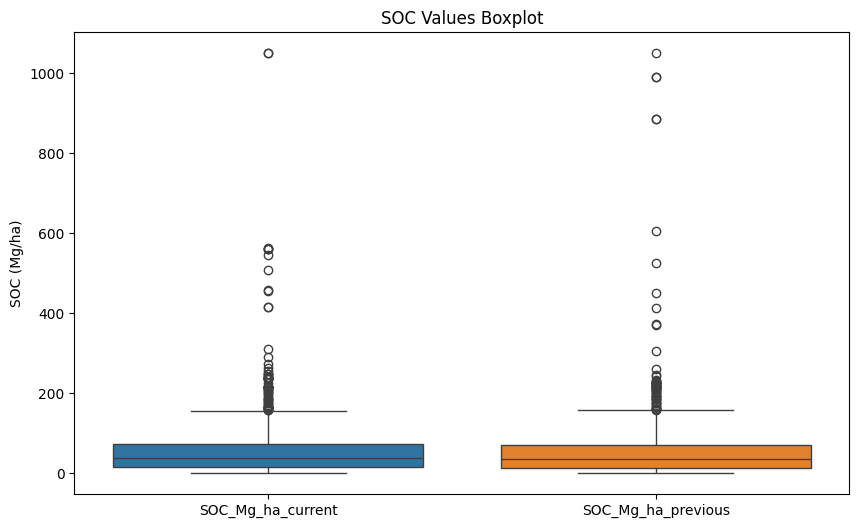

In [ ]:
#visualize the data
#SOC_Mg_ha_current and SOC_Mg_ha_previous boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=soc_df[['SOC_Mg_ha_current', 'SOC_Mg_ha_previous']])
plt.title('SOC Values Boxplot')
plt.ylabel('SOC (Mg/ha)')
plt.show()

In [ ]:
#We want to aggregate the data by site, but to do so, we need to aggregate the data by plot and depth within each site

#We will filter the data to only include data from the top 20cm of soil. We will use the columns 'soil_from_cm_current', 'soil_to_cm_current'
#and 'soil_from_cm_previous' and 'soil_to_cm_previous' to determine the depth of the soil sample. We will then filter the data to only include samples from the top 20cm of soil.

#We will then aggregate the data by site, plot, and depth. We will calculate the mean SOC for each plot


# Function to calculate weighted mean for current SOC values
'''
def weighted_mean_current(group):
    total_depth = 0
    total_weighted_soc = 0
    for _, row in group.iterrows():
        depth_range = row['soil_to_cm_current'] - row['soil_from_cm_current']
        if row['soil_to_cm_current'] <= 20:  # Only consider depths up to 20 cm
            total_depth += depth_range
            total_weighted_soc += row['SOC_Mg_ha_current'] * depth_range
    return total_weighted_soc / total_depth if total_depth > 0 else None
'''



def weighted_mean_current(group):
    group = group[group['soil_to_cm_current'] <= 20]  # Keep only rows with depths up to 20 cm
    if group.empty:
        return None  # Return None if no data within top 20cm
    total_depth = 0
    total_weighted_soc = 0
    for _, row in group.iterrows():
        depth_range = row['soil_to_cm_current'] - row['soil_from_cm_current']
        total_depth += depth_range
        total_weighted_soc += row['SOC_Mg_ha_current'] * depth_range
    return total_weighted_soc / total_depth



In [ ]:


# Function to calculate weighted mean for previous SOC values
'''
def weighted_mean_previous(group):
    total_depth = 0
    total_weighted_soc = 0
    for _, row in group.iterrows():
        depth_range = row['soil_to_cm_previous'] - row['soil_from_cm_previous']
        if row['soil_to_cm_previous'] <= 20:  # Only consider depths up to 20 cm
            total_depth += depth_range
            total_weighted_soc += row['SOC_Mg_ha_previous'] * depth_range
    return total_weighted_soc / total_depth if total_depth > 0 else None
'''

# Function to calculate weighted mean for previous SOC values, removing rows without data in top 20cm
def weighted_mean_previous(group):
    group = group[group['soil_to_cm_previous'] <= 20]  # Keep only rows with depths up to 20 cm
    if group.empty:
        return None  # Return None if no data within top 20cm
    total_depth = 0
    total_weighted_soc = 0
    for _, row in group.iterrows():
        depth_range = row['soil_to_cm_previous'] - row['soil_from_cm_previous']
        total_depth += depth_range
        total_weighted_soc += row['SOC_Mg_ha_previous'] * depth_range
    return total_weighted_soc / total_depth

In [ ]:

# Group by site and plot
grouped = soc_df.groupby(['IDstudy', 'plotID'])

In [ ]:
grouped.head()

,IDstudy,plotID,country,region,temperature_Celsiul,CHANGE_management,SOC_Mg_ha_current,SOC_Mg_ha_previous,soil_to_cm_current,soil_from_cm_current,soil_to_cm_previous,soil_from_cm_previous
0,1,1,Brazil,SaoPaulo,21.0,0,20.70,17.39,10.0,0.0,10.0,0.0
1,1,1,Brazil,SaoPaulo,21.0,0,12.54,15.57,20.0,10.0,20.0,10.0
2,1,1,Brazil,SaoPaulo,21.0,0,30.92,55.38,60.0,20.0,60.0,20.0
3,1,1,Brazil,SaoPaulo,21.0,0,36.23,36.10,100.0,60.0,100.0,60.0
4,1,2,Brazil,SaoPaulo,21.0,0,16.43,16.28,10.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1600,180,708,China,Xishuangbanna,22.3,0,NaN,NaN,60.0,45.0,60.0,45.0
1601,180,709,China,Xishuangbanna,22.3,0,NaN,NaN,15.0,0.0,15.0,0.0
1602,180,709,China,Xishuangbanna,22.3,0,NaN,NaN,30.0,15.0,30.0,15.0
1603,180,709,China,Xishuangbanna,22.3,0,NaN,NaN,45.0,30.0,45.0,30.0


In [ ]:

# Initialize lists to store results
results = []

In [ ]:

for (site, plot), group in grouped:
    # Get mean SOC for the current values
    current_soc_mean = weighted_mean_current(group)

    # Get mean SOC for the previous values
    previous_soc_mean = weighted_mean_previous(group)

    # Append results for each site-plot combination
    results.append({'IDstudy': site, 'plotID': plot, 'country': group['country'].iloc[0],
                    'region': group['region'].iloc[0],
                    'CHANGE_management': group['CHANGE_management'].iloc[0],
                    'Mean_SOC_Mgha_Current': current_soc_mean,
                    'Mean_SOC_Mgha_Previous': previous_soc_mean})

# Convert results to a DataFrame
mean_soc_df = pd.DataFrame(results)

In [ ]:

# Convert results to a DataFrame
mean_soc_df.head()


,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
0,1,1,Brazil,SaoPaulo,0,16.62,16.480
1,1,2,Brazil,SaoPaulo,0,15.47,17.270
2,1,3,Brazil,SaoPaulo,0,15.28,14.460
3,1,4,Brazil,SaoPaulo,0,8.51,15.145
4,2,5,Canada,Meadow_Lake,0,NaN,NaN


In [ ]:
nan_count = mean_soc_df['Mean_SOC_Mgha_Previous'].isna().sum()
nan_count

502

In [ ]:
#Show all the Mean_SOC for only CHANGE_management YES

#Count the CHANGE_management values
mean_soc_df['CHANGE_management'].value_counts()



,count
CHANGE_management,
0,610
1,99


In [ ]:
mean_soc_df = mean_soc_df.dropna()  # Drop rows with NaN values
mean_soc_df

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
0,1,1,Brazil,SaoPaulo,0,16.620000,16.480000
1,1,2,Brazil,SaoPaulo,0,15.470000,17.270000
2,1,3,Brazil,SaoPaulo,0,15.280000,14.460000
3,1,4,Brazil,SaoPaulo,0,8.510000,15.145000
7,4,8,New_Zeland,Bay_of_Plenty,0,65.902222,43.735556
...,...,...,...,...,...,...,...
702,179,703,India,Karnal,0,28.800000,21.600000
703,179,704,India,Karnal,0,25.700000,21.600000
704,179,705,India,Karnal,0,27.300000,21.600000
705,179,706,India,Karnal,0,37.000000,21.600000


In [ ]:
#Count the CHANGE_management values
mean_soc_df['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,136
1,68


In [ ]:
# Let's first investiage some of the outlier points

# Let's sort the dataframe to just look into plots with over 400 mg/Ha SOC as either previous OR current


outliers = mean_soc_df[mean_soc_df['Mean_SOC_Mgha_Current'] > 400]
outliers = outliers[outliers['Mean_SOC_Mgha_Previous'] > 400]


outliers


,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
360,87,361,Malaysia,north_Selangor,0,1050.0,990.0
361,87,362,Malaysia,north_Selangor,0,1050.0,885.0
362,87,363,Malaysia,north_Selangor,0,560.0,990.0
363,87,364,Malaysia,north_Selangor,0,560.0,885.0
364,87,365,Malaysia,north_Selangor,0,560.0,1050.0


We can see that all of the major outliers are coming from a single site: Malaysia north_Sengalor (ID 87)

In [ ]:
#Let's observe more moderate outliers, between 200-400 mg/Ha

outliers = mean_soc_df[mean_soc_df['Mean_SOC_Mgha_Current'] > 200]
outliers = outliers[outliers['Mean_SOC_Mgha_Current'] < 400]
outliers

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
48,16,49,Venezuela,Orinoco,0,229.2,218.408333
49,16,50,Venezuela,Orinoco,0,229.2,228.850000


In [ ]:
nan_count = mean_soc_df['Mean_SOC_Mgha_Previous'].isna().sum()
nan_count

0

In [ ]:
mean_soc_df.describe()

,IDstudy,plotID,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,82.112745,316.872549,0.333333,47.099790,48.112350
std,58.368559,235.380759,0.472564,122.886536,147.922281
min,1.000000,1.000000,0.000000,1.200000,1.135000
25%,37.750000,134.750000,0.000000,12.495000,12.400000
50%,56.500000,216.500000,0.000000,20.600000,17.800000
75%,150.000000,595.250000,1.000000,37.610000,30.380000
max,179.000000,707.000000,1.000000,1050.000000,1050.000000


In [ ]:
stats_mean = mean_soc_df[['Mean_SOC_Mgha_Current', 'Mean_SOC_Mgha_Previous']].agg(['std', 'min', 'max', 'mean'])

# Transpose the DataFrame for better readability
stats_mean = stats_mean.T

# Display the results
stats_mean

,std,min,max,mean
Mean_SOC_Mgha_Current,122.886536,1.200,1050.0,47.09979
Mean_SOC_Mgha_Previous,147.922281,1.135,1050.0,48.11235


In [ ]:
mean_soc_df.head()

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous
0,1,1,Brazil,SaoPaulo,0,16.620000,16.480000
1,1,2,Brazil,SaoPaulo,0,15.470000,17.270000
2,1,3,Brazil,SaoPaulo,0,15.280000,14.460000
3,1,4,Brazil,SaoPaulo,0,8.510000,15.145000
7,4,8,New_Zeland,Bay_of_Plenty,0,65.902222,43.735556


In [ ]:

#Calcuate the delta SOC values by subtracting the previous SOC values from the current SOC values

#We will create a new column in the mean_soc_df dataframe called 'Delta_SOC' that calculates the difference between the current and previous SOC values

# Calculate the delta SOC values
mean_soc_df['Delta_SOC'] = mean_soc_df['Mean_SOC_Mgha_Current'] - mean_soc_df['Mean_SOC_Mgha_Previous']
mean_soc_df['Percent_Change_SOC'] = (mean_soc_df['Delta_SOC'] / mean_soc_df['Mean_SOC_Mgha_Previous']) * 100

mean_soc_df.head()

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
0,1,1,Brazil,SaoPaulo,0,16.620000,16.480000,0.140000,0.849515
1,1,2,Brazil,SaoPaulo,0,15.470000,17.270000,-1.800000,-10.422698
2,1,3,Brazil,SaoPaulo,0,15.280000,14.460000,0.820000,5.670816
3,1,4,Brazil,SaoPaulo,0,8.510000,15.145000,-6.635000,-43.809838
7,4,8,New_Zeland,Bay_of_Plenty,0,65.902222,43.735556,22.166667,50.683400


In [ ]:
mean_soc_df['Delta_SOC'].describe()

,Delta_SOC
count,204.000000
mean,-1.012560
std,54.652817
min,-490.000000
25%,-1.303750
50%,1.520000
75%,5.677500
max,165.000000


In [ ]:
mean_soc_df['Percent_Change_SOC'].describe()

,Percent_Change_SOC
count,204.000000
mean,24.434502
std,65.294761
min,-54.101266
25%,-7.879794
50%,12.147055
75%,37.738229
max,557.380293


In [ ]:
# calculate the total aggregate

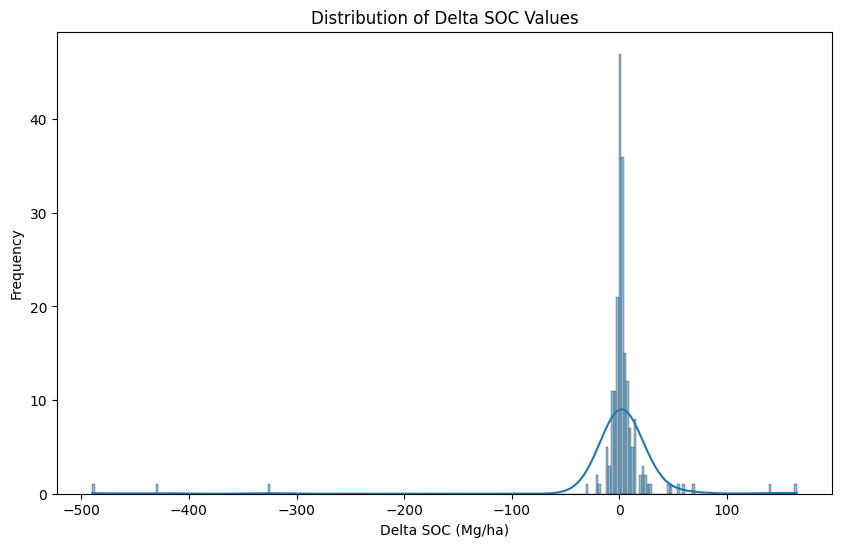

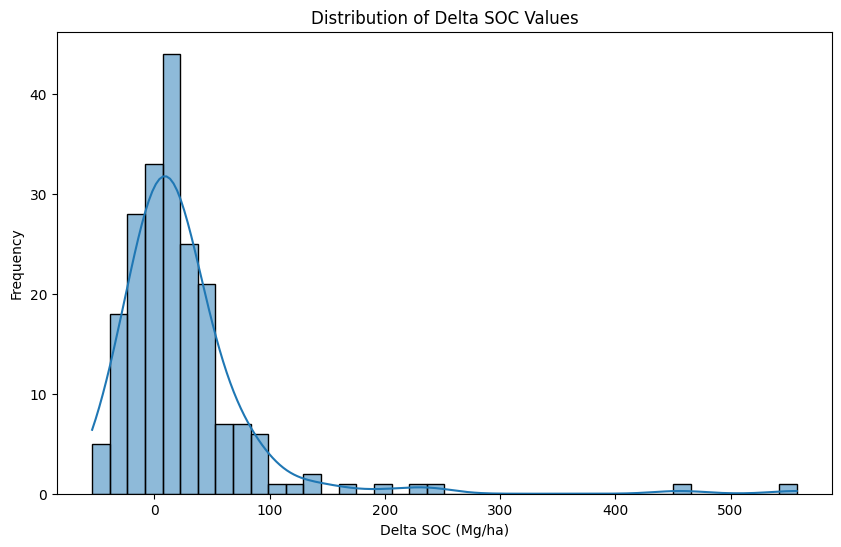

Mean: -1.01
Median: 1.52
Standard Deviation: 54.52
Skewness: -6.70
Kurtosis: 54.31
count    204.000000
mean      -1.012560
std       54.652817
min     -490.000000
25%       -1.303750
50%        1.520000
75%        5.677500
max      165.000000
Name: Delta_SOC, dtype: float64
Mean: 24.43
Median: 12.15
Standard Deviation: 65.13
Skewness: 4.61
Kurtosis: 30.19
count    204.000000
mean      24.434502
std       65.294761
min      -54.101266
25%       -7.879794
50%       12.147055
75%       37.738229
max      557.380293
Name: Percent_Change_SOC, dtype: float64


In [ ]:


#Visualize the distribution of the delta SOC values

#We will create a histogram to visualize the distribution of the delta SOC values

# Create a histogram for the delta SOC values
plt.figure(figsize=(10, 6))
sns.histplot(mean_soc_df['Delta_SOC'], kde=True)
plt.title('Distribution of Delta SOC Values')
plt.xlabel('Delta SOC (Mg/ha)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(mean_soc_df['Percent_Change_SOC'], kde=True)
plt.title('Distribution of Delta SOC Values')
plt.xlabel('Delta SOC (Mg/ha)')
plt.ylabel('Frequency')
plt.show()

generate_data_summary(mean_soc_df['Delta_SOC'])
generate_data_summary(mean_soc_df['Percent_Change_SOC'])

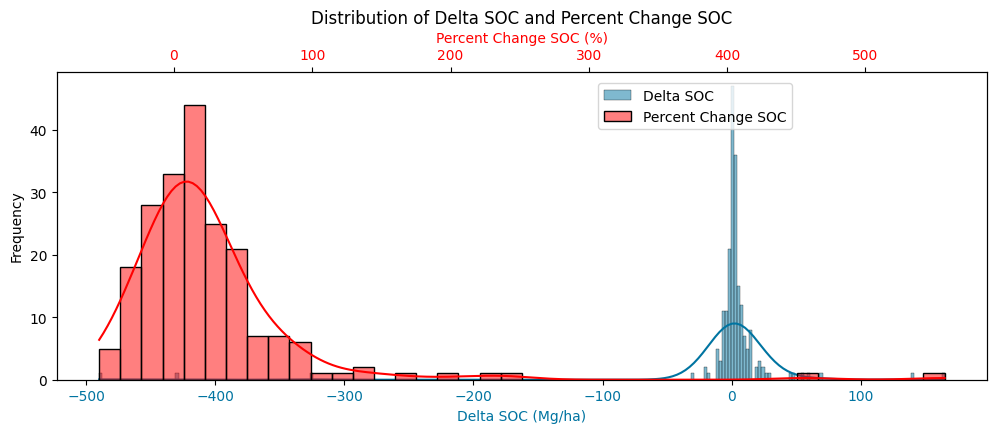

Percent_Change_SOC Statistics:
Mean: 24.43
Median: 12.15
Standard Deviation: 65.13
Skewness: 4.61
Kurtosis: 30.19
count    204.000000
mean      24.434502
std       65.294761
min      -54.101266
25%       -7.879794
50%       12.147055
75%       37.738229
max      557.380293
Name: Percent_Change_SOC, dtype: float64
Delta_SOC Statistics:
Mean: -1.01
Median: 1.52
Standard Deviation: 54.52
Skewness: -6.70
Kurtosis: 54.31
count    204.000000
mean      -1.012560
std       54.652817
min     -490.000000
25%       -1.303750
50%        1.520000
75%        5.677500
max      165.000000
Name: Delta_SOC, dtype: float64


In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))  # Increase width by 80%, decrease height by 20%

# Plot Delta_SOC on the first x-axis with the specified color
sns.histplot(mean_soc_df['Delta_SOC'], kde=True, ax=ax1, color='#0074A1', label='Delta SOC')
ax1.set_xlabel('Delta SOC (Mg/ha)', color='#0074A1')  # Change x-axis label color
ax1.set_ylabel('Frequency')
ax1.tick_params('x', labelcolor='#0074A1')  # Change x-axis tick color
#ax1.set_xlim([-40, 40])

# Create a second x-axis
ax2 = ax1.twiny()

# Plot Percent_Change_SOC on the second x-axis
sns.histplot(mean_soc_df['Percent_Change_SOC'], kde=True, ax=ax2, color='red', label='Percent Change SOC')
ax2.set_xlabel('Percent Change SOC (%)', color='red')
ax2.tick_params('x', labelcolor='red')

# Add a title and legend
plt.title('Distribution of Delta SOC and Percent Change SOC')
fig.legend(loc=(0.6, 0.7))

# Save as a PNG with a transparent background
plt.savefig('histogram_plot.png', transparent=True)
plt.show()

#summary statistics

print(f"Percent_Change_SOC Statistics:")
generate_data_summary(mean_soc_df['Percent_Change_SOC'])

print(f"Delta_SOC Statistics:")
generate_data_summary(mean_soc_df['Delta_SOC'])


In [ ]:
#Count the CHANGE_management values
mean_soc_df['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,136
1,68


In [ ]:
mean_soc_df.describe()

,IDstudy,plotID,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,82.112745,316.872549,0.333333,47.099790,48.112350,-1.012560,24.434502
std,58.368559,235.380759,0.472564,122.886536,147.922281,54.652817,65.294761
min,1.000000,1.000000,0.000000,1.200000,1.135000,-490.000000,-54.101266
25%,37.750000,134.750000,0.000000,12.495000,12.400000,-1.303750,-7.879794
50%,56.500000,216.500000,0.000000,20.600000,17.800000,1.520000,12.147055
75%,150.000000,595.250000,1.000000,37.610000,30.380000,5.677500,37.738229
max,179.000000,707.000000,1.000000,1050.000000,1050.000000,165.000000,557.380293


In [ ]:
#remove outliers
mean_soc_clean = mean_soc_df[mean_soc_df['Mean_SOC_Mgha_Current'] < 300]
mean_soc_clean = mean_soc_df[mean_soc_df['Mean_SOC_Mgha_Previous'] < 300]

mean_soc_clean.describe()

,IDstudy,plotID,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
count,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,81.98995,315.713568,0.341709,29.288227,25.200600,4.087627,25.561597
std,59.09571,238.218522,0.475479,31.906811,28.296152,14.526359,65.576143
min,1.00000,1.000000,0.000000,1.200000,1.135000,-28.900000,-54.101266
25%,36.50000,133.500000,0.000000,12.477500,12.400000,-1.095000,-6.819988
50%,56.00000,214.000000,0.000000,20.230000,17.800000,1.550000,13.162345
75%,150.00000,596.500000,1.000000,34.720000,29.940000,5.600000,39.177597
max,179.00000,707.000000,1.000000,229.200000,228.850000,140.850000,557.380293


In [ ]:
#Count the CHANGE_management values
mean_soc_clean['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,131
1,68


In [ ]:
print(mean_soc_clean)

     IDstudy  plotID     country         region  CHANGE_management  \
0          1       1      Brazil       SaoPaulo                  0   
1          1       2      Brazil       SaoPaulo                  0   
2          1       3      Brazil       SaoPaulo                  0   
3          1       4      Brazil       SaoPaulo                  0   
7          4       8  New_Zeland  Bay_of_Plenty                  0   
..       ...     ...         ...            ...                ...   
702      179     703       India         Karnal                  0   
703      179     704       India         Karnal                  0   
704      179     705       India         Karnal                  0   
705      179     706       India         Karnal                  0   
706      179     707       India         Karnal                  0   

     Mean_SOC_Mgha_Current  Mean_SOC_Mgha_Previous  Delta_SOC  \
0                16.620000               16.480000   0.140000   
1                15.470000   

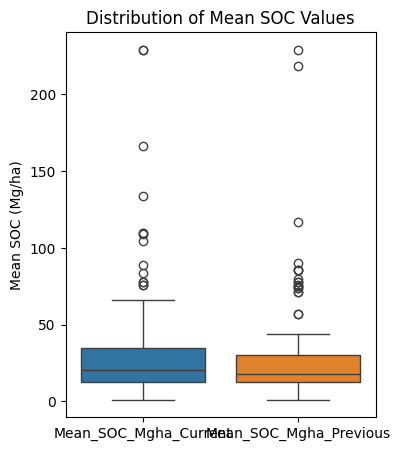

In [ ]:
#If the data was sorted earlier to exclude all  points over 100, why are they still showing on the graph??
plt.figure(figsize=(4, 5))
sns.boxplot(data=mean_soc_clean[['Mean_SOC_Mgha_Current', 'Mean_SOC_Mgha_Previous']])
plt.title('Distribution of Mean SOC Values')
plt.ylabel('Mean SOC (Mg/ha)')
plt.show()


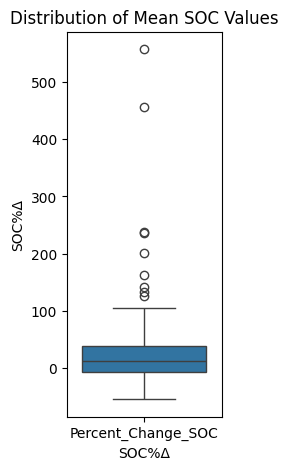

In [ ]:

#boxplot of % change
plt.figure(figsize=(2, 5))
sns.boxplot(data=mean_soc_clean[['Percent_Change_SOC']])
plt.title('Distribution of Mean SOC Values')
plt.xlabel('SOC%Δ')
plt.ylabel('SOC%Δ')
plt.show()

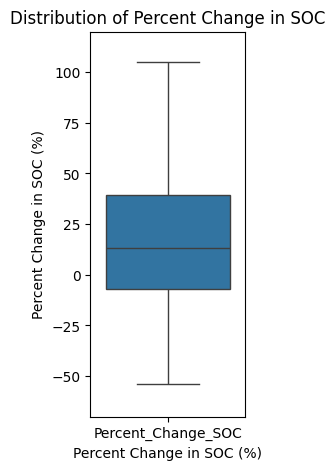

In [ ]:
#same but limited to 100
plt.figure(figsize=(2, 5))
sns.boxplot(data=mean_soc_clean[['Percent_Change_SOC']])
plt.title('Distribution of Percent Change in SOC')  # Changed title for clarity
plt.xlabel('Percent Change in SOC (%)')  # Renamed x-axis label
plt.ylabel('Percent Change in SOC (%)')  # Renamed y-axis label
plt.ylim(-70, 120)  # Set y-axis limits
plt.show()

In [ ]:
stats_clean = mean_soc_clean[['Mean_SOC_Mgha_Current', 'Mean_SOC_Mgha_Previous']].agg(['std', 'min', 'max', 'mean'])

# Transpose the DataFrame for better readability
stats_clean = stats_clean.T

#Display the stats to only 2 decimals
pd.options.display.float_format = '{:.2f}'.format

# Display the results
stats_clean

,std,min,max,mean
Mean_SOC_Mgha_Current,31.91,1.20,229.20,29.29
Mean_SOC_Mgha_Previous,28.30,1.14,228.85,25.20


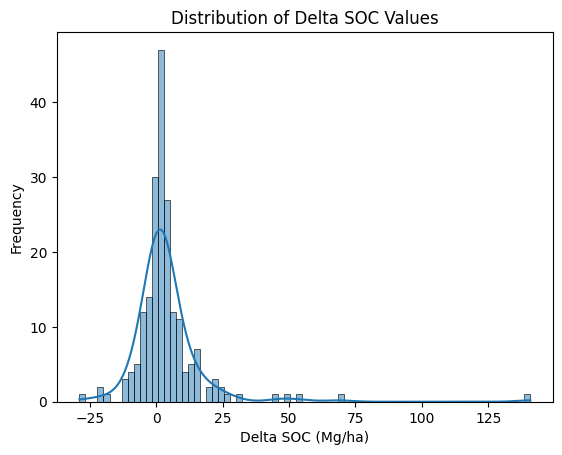

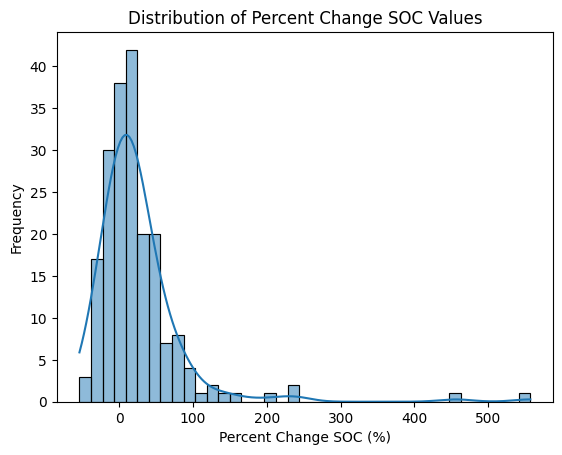

In [ ]:
#Plot the distribution of cleaned Delta_SOC and percent change SOC

sns.histplot(mean_soc_clean['Delta_SOC'], kde=True)
plt.title('Distribution of Delta SOC Values')
plt.xlabel('Delta SOC (Mg/ha)')
plt.ylabel('Frequency')
plt.show()
#
sns.histplot(mean_soc_clean['Percent_Change_SOC'], kde=True)
plt.title('Distribution of Percent Change SOC Values')
plt.xlabel('Percent Change SOC (%)')
plt.ylabel('Frequency')
plt.show()

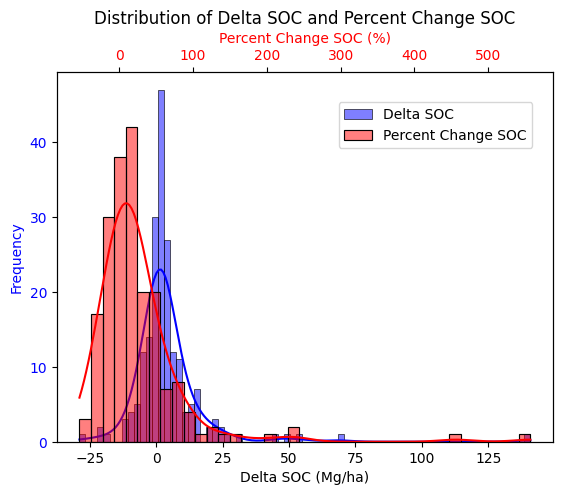

In [ ]:


fig, ax1 = plt.subplots()

# Plot Delta_SOC on the first x-axis
sns.histplot(mean_soc_clean['Delta_SOC'], kde=True, ax=ax1, color='blue', label='Delta SOC')
ax1.set_xlabel('Delta SOC (Mg/ha)')
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a second x-axis
ax2 = ax1.twiny()

# Plot Percent_Change_SOC on the second x-axis
sns.histplot(mean_soc_clean['Percent_Change_SOC'], kde=True, ax=ax2, color='red', label='Percent Change SOC')
ax2.set_xlabel('Percent Change SOC (%)', color='red')
ax2.tick_params('x', labelcolor='red')


# Add a title and legend
plt.title('Distribution of Delta SOC and Percent Change SOC')
fig.legend(loc=(0.6, 0.7))
plt.show()

In [ ]:
# Print the results
print(f"Delta_SOC Statistics:")
generate_data_summary(mean_soc_clean['Delta_SOC'])

print(f"Percent_Change_SOC Statistics:")
generate_data_summary(mean_soc_clean['Percent_Change_SOC'])

Delta_SOC Statistics:
Mean: 4.09
Median: 1.55
Standard Deviation: 14.49
Skewness: 5.08
Kurtosis: 40.88
count   199.00
mean      4.09
std      14.53
min     -28.90
25%      -1.10
50%       1.55
75%       5.60
max     140.85
Name: Delta_SOC, dtype: float64
Percent_Change_SOC Statistics:
Mean: 25.56
Median: 13.16
Standard Deviation: 65.41
Skewness: 4.63
Kurtosis: 30.12
count   199.00
mean     25.56
std      65.58
min     -54.10
25%      -6.82
50%      13.16
75%      39.18
max     557.38
Name: Percent_Change_SOC, dtype: float64


In [ ]:
#calculate delta topsoil SOC for each region
soc_by_region = mean_soc_clean.groupby('region')[['Mean_SOC_Mgha_Current', 'Mean_SOC_Mgha_Previous', 'Delta_SOC', 'Percent_Change_SOC']].mean().reset_index()

soc_by_region.sort_values(by='Delta_SOC', ascending=False).head()


,region,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
10,Campina,77.90,32.20,45.70,141.93
25,Jaen,65.75,24.50,41.25,191.71
31,Malaga,52.95,28.45,24.50,86.12
35,Monte_Verde,109.23,85.50,23.73,27.76
53,Talamanca,46.31,22.91,23.40,102.15


In [ ]:
delta_soc_by_country = mean_soc_clean.groupby('country')[['Mean_SOC_Mgha_Current', 'Mean_SOC_Mgha_Previous', 'Delta_SOC', 'Percent_Change_SOC']].mean().reset_index()

delta_soc_by_country.head()

,country,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
0,Brazil,35.97,38.28,-2.31,-9.38
1,Cameroon,12.75,12.85,-0.10,-0.78
2,Canada,84.50,81.90,2.59,3.05
3,Costa_rica,38.91,27.23,11.68,54.44
4,Ethiopia,6.76,6.28,0.48,7.64


In [ ]:
mean_soc_clean.head()

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC
0,1,1,Brazil,SaoPaulo,0,16.62,16.48,0.14,0.85
1,1,2,Brazil,SaoPaulo,0,15.47,17.27,-1.80,-10.42
2,1,3,Brazil,SaoPaulo,0,15.28,14.46,0.82,5.67
3,1,4,Brazil,SaoPaulo,0,8.51,15.14,-6.63,-43.81
7,4,8,New_Zeland,Bay_of_Plenty,0,65.90,43.74,22.17,50.68


In [ ]:
mean_soc_clean['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,131
1,68


In [ ]:
df_luc.head()

,IDstudy,plotID,land_use_change_rank2
0,1,3,4
1,1,3,4
2,1,3,4
3,1,3,4
4,1,4,2


In [ ]:
# Merge df_luc with mean_soc_clean on the columns IDstudy and plotID (i.e. columns with the same IDstudy and plotID should be merged)

df_merged = pd.merge(mean_soc_clean, df_luc, on=['IDstudy', 'plotID'])

#Remove duplicates
df_merged.drop_duplicates(inplace=True)
df_merged = df_merged.rename(columns={'land_use_change_rank2': 'LUC_rank'})

df_merged.head()

,IDstudy,plotID,country,region,CHANGE_management,Mean_SOC_Mgha_Current,Mean_SOC_Mgha_Previous,Delta_SOC,Percent_Change_SOC,LUC_rank
0,1,3,Brazil,SaoPaulo,0,15.28,14.46,0.82,5.67,4
4,1,4,Brazil,SaoPaulo,0,8.51,15.14,-6.63,-43.81,2
8,4,8,New_Zeland,Bay_of_Plenty,0,65.90,43.74,22.17,50.68,2
19,6,15,Germany,Ihinger_Hof,0,14.70,13.30,1.40,10.53,4
24,6,16,Germany,Ihinger_Hof,0,14.75,13.30,1.45,10.90,4


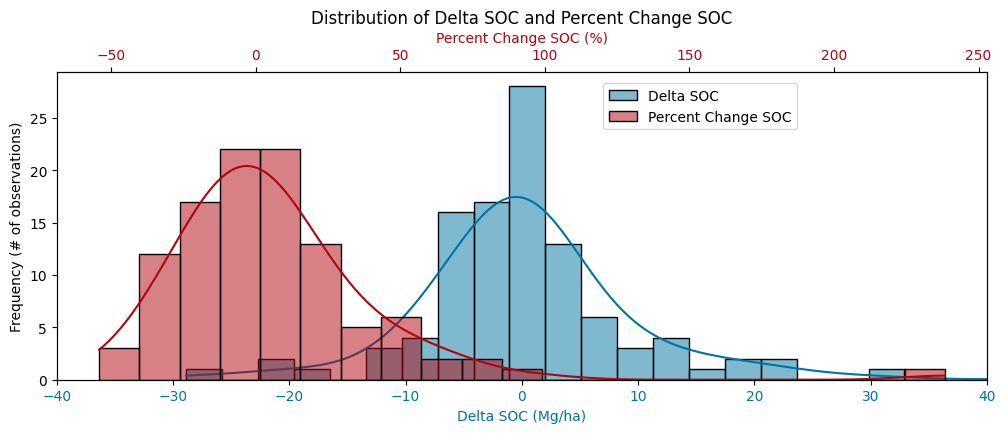

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))  # Increase width by 80%, decrease height by 20%

# Plot Delta_SOC on the first x-axis with the specified color
sns.histplot(df_merged['Delta_SOC'], kde=True, ax=ax1, color='#0074A1', label='Delta SOC')
ax1.set_xlabel('Delta SOC (Mg/ha)', color='#0074A1')  # Change x-axis label color
ax1.set_ylabel('Frequency (# of observations)')
ax1.tick_params('x', labelcolor='#0074A1')  # Change x-axis tick color
ax1.set_xlim([-40, 40])

# Create a second x-axis
ax2 = ax1.twiny()

# Plot Percent_Change_SOC on the second x-axis
sns.histplot(df_merged['Percent_Change_SOC'], kde=True, ax=ax2, color='#B0040E', label='Percent Change SOC')
ax2.set_xlabel('Percent Change SOC (%)', color='#B0040E')
ax2.tick_params('x', labelcolor='#B0040E')

# Add a title and legend
plt.title('Distribution of Delta SOC and Percent Change SOC')
fig.legend(loc=(0.6, 0.7))

# Save as a PNG with a transparent background
plt.savefig('histogram_plot.png', transparent=True)
plt.show()

In [ ]:
#Count how many unique values we have in CHANGE_management
df_merged['CHANGE_management'].value_counts()

,count
CHANGE_management,
0,106


In [ ]:
df_merged['Percent_Change_SOC'].describe()

,Percent_Change_SOC
count,106.00
mean,5.36
std,36.12
min,-54.10
25%,-14.12
50%,0.74
75%,20.32
max,238.28


In [ ]:
# Print the results
print(f"Delta_SOC Statistics:")
generate_data_summary(df_merged['Delta_SOC'])

print(f"Percent_Change_SOC Statistics:")
generate_data_summary(df_merged['Percent_Change_SOC'])

Delta_SOC Statistics:
Mean: 1.18
Median: 0.09
Standard Deviation: 11.01
Skewness: 1.79
Kurtosis: 7.39
count   106.00
mean      1.18
std      11.07
min     -28.90
25%      -3.96
50%       0.09
75%       3.55
max      54.59
Name: Delta_SOC, dtype: float64
Percent_Change_SOC Statistics:
Mean: 5.36
Median: 0.74
Standard Deviation: 35.95
Skewness: 2.78
Kurtosis: 14.88
count   106.00
mean      5.36
std      36.12
min     -54.10
25%     -14.12
50%       0.74
75%      20.32
max     238.28
Name: Percent_Change_SOC, dtype: float64


In [ ]:
#Create a boxplot with tap that compares delta SOC values by land_use_change

#First, set LUC rank as a string variable

df_merged['LUC_rank'] = df_merged['LUC_rank'].astype(str)

tap.plot_stats(
        df_merged,
        x='LUC_rank',
        y='Percent_Change_SOC',
        order=["1", "2", "3", "4", "5"],
        type_test= "t-test")


In [ ]:
df_merged['LUC_rank'] = df_merged['LUC_rank'].astype(str)

tap.plot_stats(
        df_merged,
        x='LUC_rank',
        y='Delta_SOC',
        order=["1", "2", "3", "4", "5"],
        type_test= "t-test")


<ipython-input-63-5fc3454eadd7>:15: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



UnboundLocalError: local variable 'boxprops' referenced before assignment

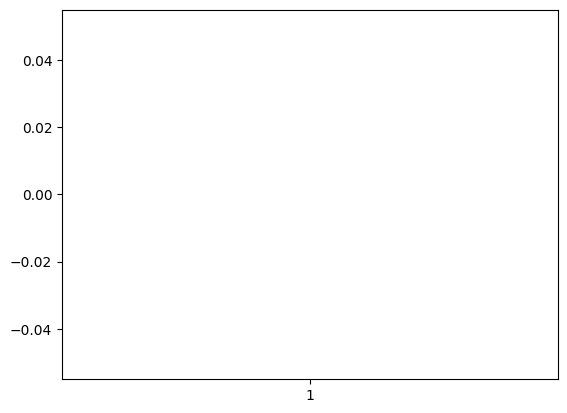

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots()

# Define the color palette for the boxplot
palette = sns.color_palette("Spectral", 5)

# Convert 'LUC_rank' to categorical with explicit order
df_merged['LUC_rank'] = pd.Categorical(df_merged['LUC_rank'], categories=[1, 2, 3, 4, 5], ordered=True)

# Plot the boxplot using 'LUC_rank' directly as the categorical x-axis
sns.boxplot(data=df_merged, x='LUC_rank', y='Percent_Change_SOC',ax=ax, palette=palette)

# Plot regplot using numerical values for x (positions of categories)
sns.regplot(x=df_merged['LUC_rank'].cat.codes, y=df_merged['Percent_Change_SOC'], scatter=False, ax=ax, color='blue')

# Adjust labels and formatting
ax.set_xlabel('LUC Rank')
ax.set_ylabel('Percent Change SOC')
plt.title('Percent Change SOC by LUC Rank')
plt.ylim(-70, 120)

# Replace numerical x-ticks (from regplot) with category labels
ax.set_xticks(df_merged['LUC_rank'].cat.codes)  # Set the positions of the ticks
ax.set_xticklabels(df_merged['LUC_rank'].cat.categories)  # Set the labels to LUC categories

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

palette = sns.color_palette("Spectral", 5)

# Convert 'LUC_rank' to categorical with explicit order
df_merged['LUC_rank'] = pd.Categorical(df_merged['LUC_rank'], categories=[1, 2, 3, 4, 5], ordered=True)

# Use the same x-axis values for both plots
x_values = df_merged['LUC_rank'].cat.codes  # Get numerical codes for categories

# Plot boxplot
sns.boxplot(data=df_merged, x='LUC_rank', y='Percent_Change_SOC', ax=ax, palette=palette)

# Plot regplot using the same x-axis values
sns.regplot(x=x_values, y=df_merged['Percent_Change_SOC'], scatter=False, ax=ax)

plt.xlabel('LUC Rank')
plt.ylabel('Percent Change SOC')
plt.title('Percent Change SOC by LUC Rank')
plt.ylim(-70, 120)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer
model = sm.ols('Percent_Change_SOC ~ LUC_rank', data=df_merged).fit()
stargazer = Stargazer([model])
stargazer



In [ ]:
fig, ax = plt.subplots()

# Convert 'LUC_rank' to categorical with explicit order
df_merged['LUC_rank'] = pd.Categorical(df_merged['LUC_rank'], categories=[1, 2, 3, 4, 5], ordered=True)

# Use the same x-axis values for both plots
x_values = df_merged['LUC_rank'].cat.codes  # Get numerical codes for categories

# Plot boxplot for Delta SOC
sns.boxplot(data=df_merged, x='LUC_rank', y='Delta_SOC', ax=ax, palette=palette)

# Plot regplot for Delta SOC using the same x-axis values
sns.regplot(x=x_values, y=df_merged['Delta_SOC'], scatter=False, ax=ax)

plt.xlabel('LUC Rank')
plt.ylabel('ΔSOC (Mg/ha)')  # Update y-axis label
plt.title('ΔSOC by LUC Rank')  # Update title
#plt.ylim(-70, 120)  # Adjust y-axis limits if needed
plt.show()

In [ ]:
model = sm.ols('Delta_SOC ~ LUC_rank', data=df_merged).fit()
stargazer = Stargazer([model])
stargazer



In [ ]:

# Assuming df_merged is your DataFrame and it's already loaded

# Create a boxplot with pandas
df_merged.boxplot(column='Percent_Change_SOC', by='LUC_rank')

# Customize the plot if needed (e.g., labels, title)
import matplotlib.pyplot as plt
plt.xlabel("LUC Rank")
plt.ylabel("Percent Change SOC")
plt.title("Percent Change in SOC by LUC Rank")
plt.suptitle("")  # Remove the automatic title generated by pandas

plt.show()

In [ ]:
# prompt: correlation between percent change and soc

correlation = mean_soc_clean['Percent_Change_SOC'].corr(mean_soc_clean['Mean_SOC_Mgha_Current'])
print(f"Correlation between Percent Change SOC and Mean SOC Current: {correlation}")


In [ ]:
# prompt: run a regression between temperature and delta soc

import statsmodels.formula.api as sm

# Create the regression model
model = sm.ols('Percent_Change_SOC ~ Temperature', data=mean_soc_clean).fit()

# Print the regression results
print(model.summary())


In [ ]:
# prompt: correlation graph between delta and temp

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Delta_SOC', data=mean_soc_clean)
plt.xlabel('Temperature (°C)')
plt.ylabel('Delta SOC (Mg/ha)')
plt.title('Correlation between Temperature and Delta SOC')
plt.show()
